In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('baby.csv')

In [7]:
df

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False


In [8]:
df.columns


Index(['Unnamed: 0', 'Birth.Weight', 'Gestational.Days', 'Maternal.Age',
       'Maternal.Height', 'Maternal.Pregnancy.Weight', 'Maternal.Smoker'],
      dtype='object')

In [16]:
df1 = df[['Birth.Weight','Maternal.Smoker']]

In [43]:
df1.iloc[1168]

Birth.Weight         132
Maternal.Smoker    False
Name: 1168, dtype: object

In [19]:
org=df1.groupby('Maternal.Smoker').mean()

In [26]:
org

,Birth.Weight
Maternal.Smoker,
False,123.085315
True,113.819172


Maternal.Smoker
False    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
True     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

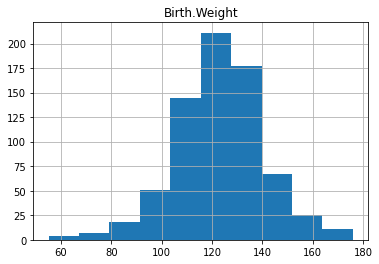

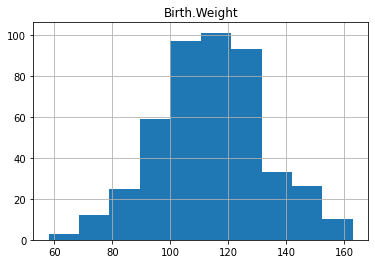

In [32]:
df2 = df1.groupby('Maternal.Smoker')
# df2.hist('Birth.Weight', group = 'Maternal.Smoker')
df2.hist('Birth.Weight')

In [20]:
org

,Birth.Weight
Maternal.Smoker,
False,123.085315
True,113.819172


In [21]:
observed_stat = org['Birth.Weight'][1] - org['Birth.Weight'][0]

In [22]:
observed_stat

-9.266142572024918

In [23]:
# random permutation

In [52]:
val = [0] * 5000
for i in range(5000):
    shuffled = df1.sample(1174,replace=False)
    df3=df1.assign(shuffledrow=shuffled['Maternal.Smoker'].values)
    g = df3.groupby('shuffledrow').mean()
    newstat = g['Birth.Weight'][1] - g['Birth.Weight'][0]
    val[i] = newstat

In [53]:
df3

,Birth.Weight,Maternal.Smoker,shuffledrow
0,120,False,True
1,113,False,False
2,128,True,True
3,108,True,False
4,136,False,False
...,...,...,...
1169,113,False,False
1170,128,False,True
1171,130,True,False
1172,125,False,True


In [54]:
val

[-0.2979752273869991,
 -0.3587884882002612,
 0.031131831131830268,
 -0.14415345003581592,
 0.6965004494416291,
 -1.5321266968325773,
 -0.24431646784587713,
 1.6552036199095,
 -0.587732528909001,
 0.5069061657297027,
 0.5498331733625861,
 1.597967609732322,
 1.157965781495193,
 0.9218672395142988,
 0.403165897283543,
 0.2529213705684299,
 0.6965004494416291,
 -0.7272453037158897,
 0.44967015555249645,
 -1.8826972591678413,
 -1.2852964029434588,
 -0.5841552782729167,
 0.3960113960114029,
 1.039916510504753,
 0.013245577951451537,
 2.624638542285595,
 -0.27293447293448025,
 1.218779042308455,
 0.9683714977832665,
 1.100729771318015,
 -0.19423495894083942,
 -0.16203970321616623,
 0.2314578667519811,
 -1.8004204945381446,
 0.009668327315395686,
 0.3817023934670942,
 -0.6557002909944032,
 -0.820253820253825,
 -0.6270822859058143,
 -0.9490348431524893,
 1.1543885308591086,
 0.403165897283543,
 -0.33374773374774236,
 -0.14057619939973165,
 0.5355241708182774,
 -0.2872434754787747,
 -0.23716196

In [57]:
df4 = pd.DataFrame(val)


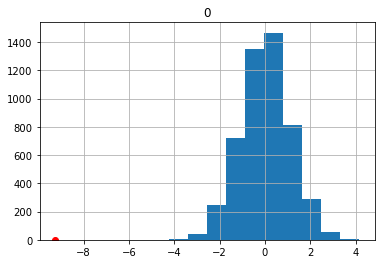

In [59]:
df4.hist()
plt.scatter(observed_stat,0,color='red')
